---
# Ley de Benford

La Ley de Benford es un principio matemático que describe un patrón muy interesante en los conjuntos de números naturales, como los que se encuentran en bases de datos financieras, poblaciones, medidas, etc. Esta ley dice que, en muchas listas de números reales que ocurren naturalmente, como los ingresos de las personas o los números que aparecen en los censos, el primer dígito significativo no es igualmente probable para todos los números. En cambio, los números tienden a comenzar más frecuentemente con dígitos más pequeños, como 1, 2 o 3, en lugar de dígitos más grandes, como 8 o 9.

Por ejemplo, si tienes una lista de números que representan los ingresos de varias personas, es más probable que encuentres más personas con ingresos que comienzan con 1 o 2 (como 1000 o 2500 dólares) que con ingresos que comienzan con 8 o 9 (como 8500 o 9500 dólares).

Este patrón puede ser útil para detectar posibles anomalías o fraudes en datos financieros, ya que los conjuntos de datos que violan la Ley de Benford podrían indicar manipulación o errores en la información. En resumen, la Ley de Benford es una regla matemática interesante que muestra cómo los números reales tienden a comportarse en la naturaleza.

Para más información:
https://en.wikipedia.org/wiki/Benford%27s_law

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)

In [3]:
df.head(2)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1993-01-29,43.9687,43.9687,43.7500,43.9375,1003200,28.000838
1993-02-01,43.9687,44.2500,43.9687,44.2500,480500,28.199990


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6026 entries, 1993-01-29 to 2016-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6026 non-null   float64
 1   High       6026 non-null   float64
 2   Low        6026 non-null   float64
 3   Close      6026 non-null   float64
 4   Volume     6026 non-null   int64  
 5   Adj Close  6026 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 329.5 KB


In [5]:
# creamos una columna con el retorno, que correspondería al precio de cierre del día menos el precio de cierre del día anterior
df['Margen'] = df.Close/df.Close.shift()-1 

In [6]:
df.head(10)

,Open,High,Low,Close,Volume,Adj Close,Margen
Date,,,,,,,
1993-01-29,43.9687,43.9687,43.7500,43.9375,1003200,28.000838,NaN
1993-02-01,43.9687,44.2500,43.9687,44.2500,480500,28.199990,0.007112
1993-02-02,44.2187,44.3750,44.1250,44.3437,201300,28.259704,0.002118
1993-02-03,44.4062,44.8437,44.3750,44.8125,529400,28.558465,0.010572
1993-02-04,44.9687,45.0937,44.4687,45.0000,531500,28.677956,0.004184
1993-02-05,44.9687,45.0625,44.7187,44.9687,492100,28.658009,-0.000696
1993-02-08,44.9687,45.1250,44.9062,44.9687,596100,28.658009,0.000000
1993-02-09,44.8125,44.8125,44.5625,44.6562,122100,28.458857,-0.006949
1993-02-10,44.6562,44.7500,44.5312,44.7187,379600,28.498687,0.001400


In [7]:
def extract_first_digit(number):
    if pd.isnull(number):
        return math.nan
    else:
        s = str(float(str(abs(number)).replace('.','')))[0]
        return math.nan if s=='0' else s


In [8]:
df['first_digit'] = df['Margen'].apply(extract_first_digit)


In [9]:
df.head()

,Open,High,Low,Close,Volume,Adj Close,Margen,first_digit
Date,,,,,,,,
1993-01-29,43.9687,43.9687,43.7500,43.9375,1003200,28.000838,NaN,NaN
1993-02-01,43.9687,44.2500,43.9687,44.2500,480500,28.199990,0.007112,7
1993-02-02,44.2187,44.3750,44.1250,44.3437,201300,28.259704,0.002118,2
1993-02-03,44.4062,44.8437,44.3750,44.8125,529400,28.558465,0.010572,1
1993-02-04,44.9687,45.0937,44.4687,45.0000,531500,28.677956,0.004184,4


In [10]:
def benford_proportion(first_digit):
    """
    returns the likelihood (between 0 and 1) that the first digit 
    of any number you are looking at starts with n, according to
    Benford's law. n should be between 1 and 9
    """
    if not isinstance(first_digit, int) or first_digit < 1 or first_digit > 9:
        raise ValueError("n should be an integer between 1 and 9")
        
    likelihood = math.log10((first_digit+1)/first_digit)
    return likelihood

In [11]:
# value counts nos puede ayudar a calcular la Frecuencia de Ocurrencia de cada digito
df['first_digit'].value_counts()

first_digit
1    1830
2     956
3     664
4     535
5     488
6     451
7     387
8     342
9     315
Name: count, dtype: int64

In [12]:
# Sin embargo, más nos sirve si lo normalizamos (Frecuencia Relativa)
df['first_digit'].value_counts(normalize=True)

first_digit
1    0.306635
2    0.160188
3    0.111260
4    0.089645
5    0.081769
6    0.075570
7    0.064846
8    0.057306
9    0.052782
Name: proportion, dtype: float64

In [13]:
# Ahora creamos un dataframe con la probabilidad calculada de la Ley de Benford y nuestra frecuencia relativa (Probabilidad Empírica)
res = pd.DataFrame(df['first_digit'].value_counts(normalize=True)) \
        .rename(columns={'first_digit':'Prob Empirica'})
res['Prob Teorica'] = [benford_proportion(n) for n in range(1,10)]

In [14]:
res

,proportion,Prob Teorica
first_digit,,
1,0.306635,0.301030
2,0.160188,0.176091
3,0.111260,0.124939
4,0.089645,0.096910
5,0.081769,0.079181
6,0.075570,0.066947
7,0.064846,0.057992
8,0.057306,0.051153
9,0.052782,0.045757


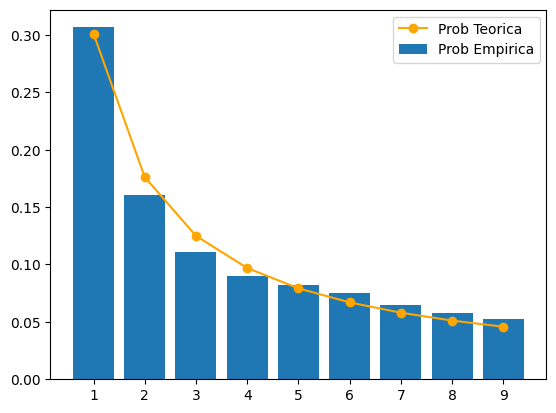

In [16]:
plt.plot(res['Prob Teorica'], marker='o', c='orange', label='Prob Teorica')
plt.bar(res.index, res['proportion'], label='Prob Empirica')
plt.legend(loc=0)

---

## Ejemplo Práctico: Detección de Fraudes con la Ley de Benford

Ley de Benford para detectar posibles anomalías en datos financieros. Dos datasets: uno que sigue la Ley de Benford (datos naturales) y otro que podría indicar manipulación.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Función para calcular la probabilidad teórica de Benford
def benford_probability(digit):
    """Calcula la probabilidad teórica según la Ley de Benford"""
    return math.log10(1 + 1/digit)

# Función para extraer el primer dígito
def get_first_digit(number):
    """Extrae el primer dígito significativo de un número"""
    if number <= 0:
        return None
    return int(str(abs(number))[0])

# Crear datos teóricos de Benford
digits = list(range(1, 10))
benford_probs = [benford_probability(d) for d in digits]

print("Probabilidades teóricas según la Ley de Benford:")
for digit, prob in zip(digits, benford_probs):
    print(f"Dígito {digit}: {prob:.3f} ({prob*100:.1f}%)")

In [ ]:
# Ejemplo 1: Datos naturales (poblaciones de ciudades)
# Simulamos poblaciones que siguen naturalmente la Ley de Benford
np.random.seed(42)

# Generar datos que siguen aproximadamente la Ley de Benford
natural_data = []
for digit in range(1, 10):
    count = int(benford_probability(digit) * 1000)  # Escalar a 1000 muestras
    # Generar números que empiecen con este dígito
    for _ in range(count):
        magnitude = np.random.exponential(2)  # Distribución exponencial
        number = digit * (10 ** int(magnitude))
        natural_data.append(number)

# Mezclar los datos
np.random.shuffle(natural_data)
natural_data = natural_data[:1000]  # Tomar exactamente 1000 muestras

print(f"Dataset natural generado: {len(natural_data)} números")
print(f"Rango: {min(natural_data):.0f} - {max(natural_data):.0f}")
print(f"Algunos ejemplos: {natural_data[:10]}")

In [ ]:
# Ejemplo 2: Datos sospechosos (posible fraude)
# Simulamos datos que NO siguen la Ley de Benford (distribución más uniforme)
np.random.seed(123)

suspicious_data = []
# Crear una distribución más uniforme (señal de manipulación)
for digit in range(1, 10):
    count = np.random.randint(80, 120)  # Distribución más uniforme
    for _ in range(count):
        magnitude = np.random.uniform(2, 5)  # Distribución uniforme
        number = digit * (10 ** int(magnitude))
        suspicious_data.append(number)

suspicious_data = suspicious_data[:1000]
np.random.shuffle(suspicious_data)

print(f"Dataset sospechoso generado: {len(suspicious_data)} números")
print(f"Rango: {min(suspicious_data):.0f} - {max(suspicious_data):.0f}")
print(f"Algunos ejemplos: {suspicious_data[:10]}")

In [ ]:
# Función para analizar un dataset con la Ley de Benford
def analyze_benford(data, dataset_name):
    """Analiza un dataset y compara con la Ley de Benford"""
    
    # Extraer primeros dígitos
    first_digits = [get_first_digit(x) for x in data if get_first_digit(x) is not None]
    
    # Calcular frecuencias observadas
    digit_counts = {}
    for digit in range(1, 10):
        digit_counts[digit] = first_digits.count(digit)
    
    # Convertir a DataFrame para análisis
    results = pd.DataFrame({
        'Digito': digits,
        'Freq_Observada': [digit_counts[d] for d in digits],
        'Prob_Observada': [digit_counts[d]/len(first_digits) for d in digits],
        'Prob_Benford': benford_probs,
        'Diferencia': [abs(digit_counts[d]/len(first_digits) - benford_probability(d)) for d in digits]
    })
    
    return results

# Analizar ambos datasets
natural_results = analyze_benford(natural_data, "Natural")
suspicious_results = analyze_benford(suspicious_data, "Sospechoso")

print("=== ANÁLISIS DATASET NATURAL ===")
print(natural_results.round(4))
print(f"\nDiferencia promedio: {natural_results['Diferencia'].mean():.4f}")

In [ ]:
print("=== ANÁLISIS DATASET SOSPECHOSO ===")
print(suspicious_results.round(4))
print(f"\nDiferencia promedio: {suspicious_results['Diferencia'].mean():.4f}")

In [ ]:
# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Dataset Natural
ax1.bar(natural_results['Digito'], natural_results['Prob_Observada'], 
        alpha=0.7, label='Observado', color='skyblue')
ax1.plot(natural_results['Digito'], natural_results['Prob_Benford'], 
         'ro-', label='Ley de Benford', linewidth=2, markersize=6)
ax1.set_title('Dataset Natural (Sigue Ley de Benford)')
ax1.set_xlabel('Primer Dígito')
ax1.set_ylabel('Probabilidad')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 0.35)

# Gráfico 2: Dataset Sospechoso
ax2.bar(suspicious_results['Digito'], suspicious_results['Prob_Observada'], 
        alpha=0.7, label='Observado', color='lightcoral')
ax2.plot(suspicious_results['Digito'], suspicious_results['Prob_Benford'], 
         'ro-', label='Ley de Benford', linewidth=2, markersize=6)
ax2.set_title('Dataset Sospechoso (NO sigue Ley de Benford)')
ax2.set_xlabel('Primer Dígito')
ax2.set_ylabel('Probabilidad')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_ylim(0, 0.35)

plt.tight_layout()
plt.show()

In [ ]:
# Test estadístico Chi-cuadrado para determinar si los datos siguen la Ley de Benford
from scipy.stats import chisquare

def benford_test(data, alpha=0.05):
    """
    Realiza un test Chi-cuadrado para verificar si los datos siguen la Ley de Benford
    H0: Los datos siguen la Ley de Benford
    H1: Los datos NO siguen la Ley de Benford
    """
    
    first_digits = [get_first_digit(x) for x in data if get_first_digit(x) is not None]
    
    # Frecuencias observadas
    observed_freq = []
    for digit in range(1, 10):
        observed_freq.append(first_digits.count(digit))
    
    # Frecuencias esperadas según Benford
    total = len(first_digits)
    expected_freq = [benford_probability(d) * total for d in range(1, 10)]
    
    # Test Chi-cuadrado
    chi2_stat, p_value = chisquare(observed_freq, expected_freq)
    
    print(f"Estadístico Chi-cuadrado: {chi2_stat:.4f}")
    print(f"P-value: {p_value:.6f}")
    print(f"Nivel de significancia: {alpha}")
    
    if p_value < alpha:
        print("CONCLUSIÓN: Rechazamos H0 - Los datos NO siguen la Ley de Benford")
        print("   Esto podría indicar manipulación o anomalías en los datos")
    else:
        print("CONCLUSIÓN: No rechazamos H0 - Los datos siguen la Ley de Benford")
        print("   Los datos parecen ser naturales/auténticos")
    
    return chi2_stat, p_value

print("=== TEST ESTADÍSTICO - DATASET NATURAL ===")
benford_test(natural_data)

print("\n=== TEST ESTADÍSTICO - DATASET SOSPECHOSO ===")
benford_test(suspicious_data)

## Interpretación de Resultados

### Dataset Natural:
- **Sigue la Ley de Benford**: Los dígitos 1, 2, 3 aparecen con mayor frecuencia
- **Test Chi-cuadrado**: P-value > 0.05 → No rechazamos H0 → Datos naturales
- **Aplicación**: Este tipo de patrón es común en datos reales como poblaciones, precios de acciones, datos contables auténticos

### Dataset Sospechoso:
- **NO sigue la Ley de Benford**: Distribución más uniforme entre dígitos
- **Test Chi-cuadrado**: P-value < 0.05 → Rechazamos H0 → Posible manipulación
- **Señal de alerta**: Este patrón podría indicar datos fabricados o manipulados

## Aplicaciones Prácticas:

1. **Auditoría Financiera**: Detectar posibles fraudes en estados financieros
2. **Análisis de Elecciones**: Identificar anomalías en resultados electorales
3. **Control de Calidad**: Verificar autenticidad de datasets científicos
4. **Investigación Forense**: Analizar documentos sospechosos de manipulación

## Limitaciones:

- No todos los datasets naturales siguen perfectamente la Ley de Benford
- Datasets pequeños pueden no mostrar el patrón claramente
- Algunos procesos legítimos pueden generar distribuciones no-Benford
- Es una herramienta de detección, no una prueba definitiva de fraude

---